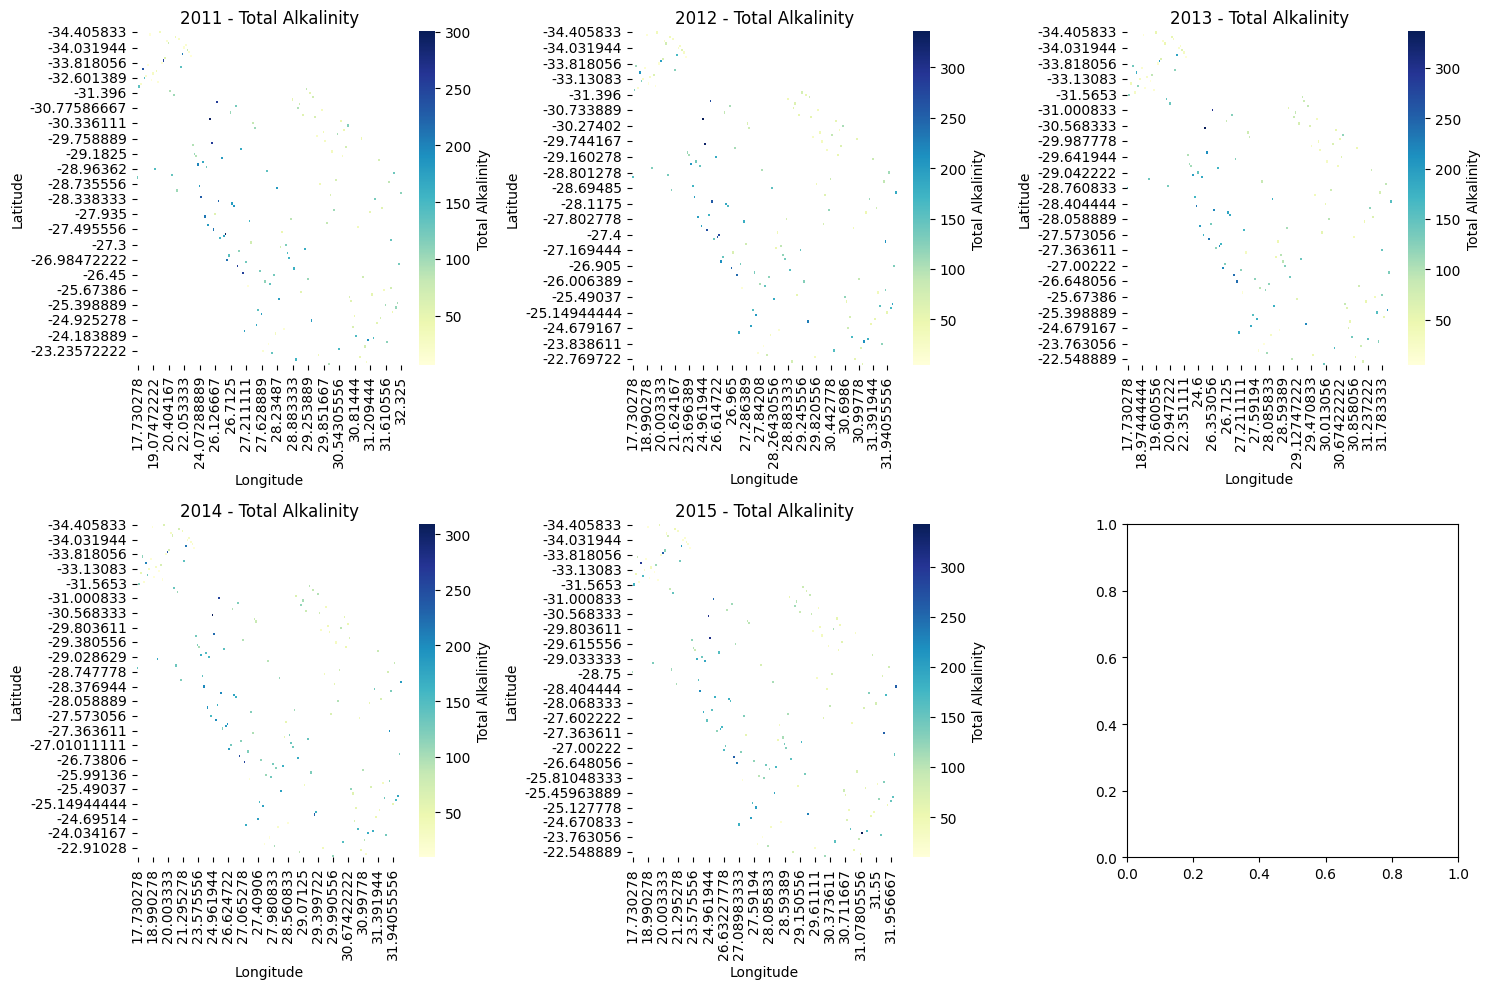

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('water_quality_training_dataset.csv')

df['Sample Date'] = pd.to_datetime(df['Sample Date'], format='%d-%m-%Y')

years = [2011, 2012, 2013, 2014, 2015]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

def plot_heatmap(df, feature, ax, year):
    ax.set_title(f"{year} - {feature}")
    year_df = df[df['Sample Date'].dt.year == year]
    heatmap_data = year_df.pivot_table(index='Latitude', columns='Longitude', values=feature)
    sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': feature}, ax=ax)

plot_heatmap(df, 'Total Alkalinity', axes[0, 0], 2011)
plot_heatmap(df, 'Total Alkalinity', axes[0, 1], 2012)
plot_heatmap(df, 'Total Alkalinity', axes[0, 2], 2013)
plot_heatmap(df, 'Total Alkalinity', axes[1, 0], 2014)
plot_heatmap(df, 'Total Alkalinity', axes[1, 1], 2015)

plt.tight_layout()
plt.show()

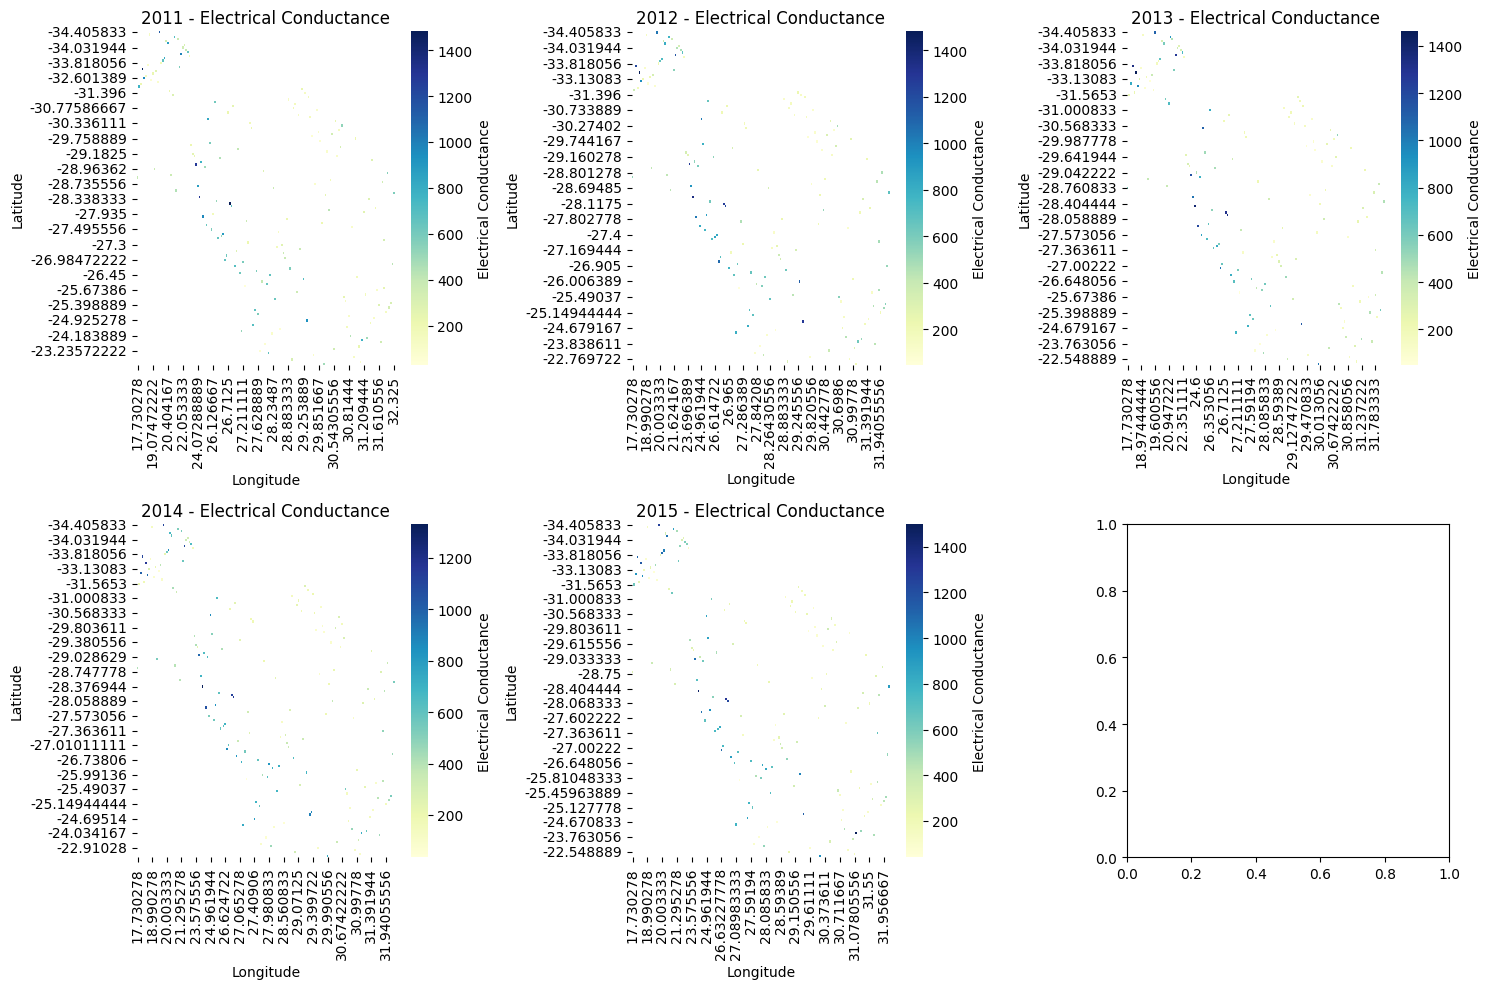

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

plot_heatmap(df, 'Electrical Conductance', axes[0, 0], 2011)
plot_heatmap(df, 'Electrical Conductance', axes[0, 1], 2012)
plot_heatmap(df, 'Electrical Conductance', axes[0, 2], 2013)
plot_heatmap(df, 'Electrical Conductance', axes[1, 0], 2014)
plot_heatmap(df, 'Electrical Conductance', axes[1, 1], 2015)

plt.tight_layout()
plt.show()

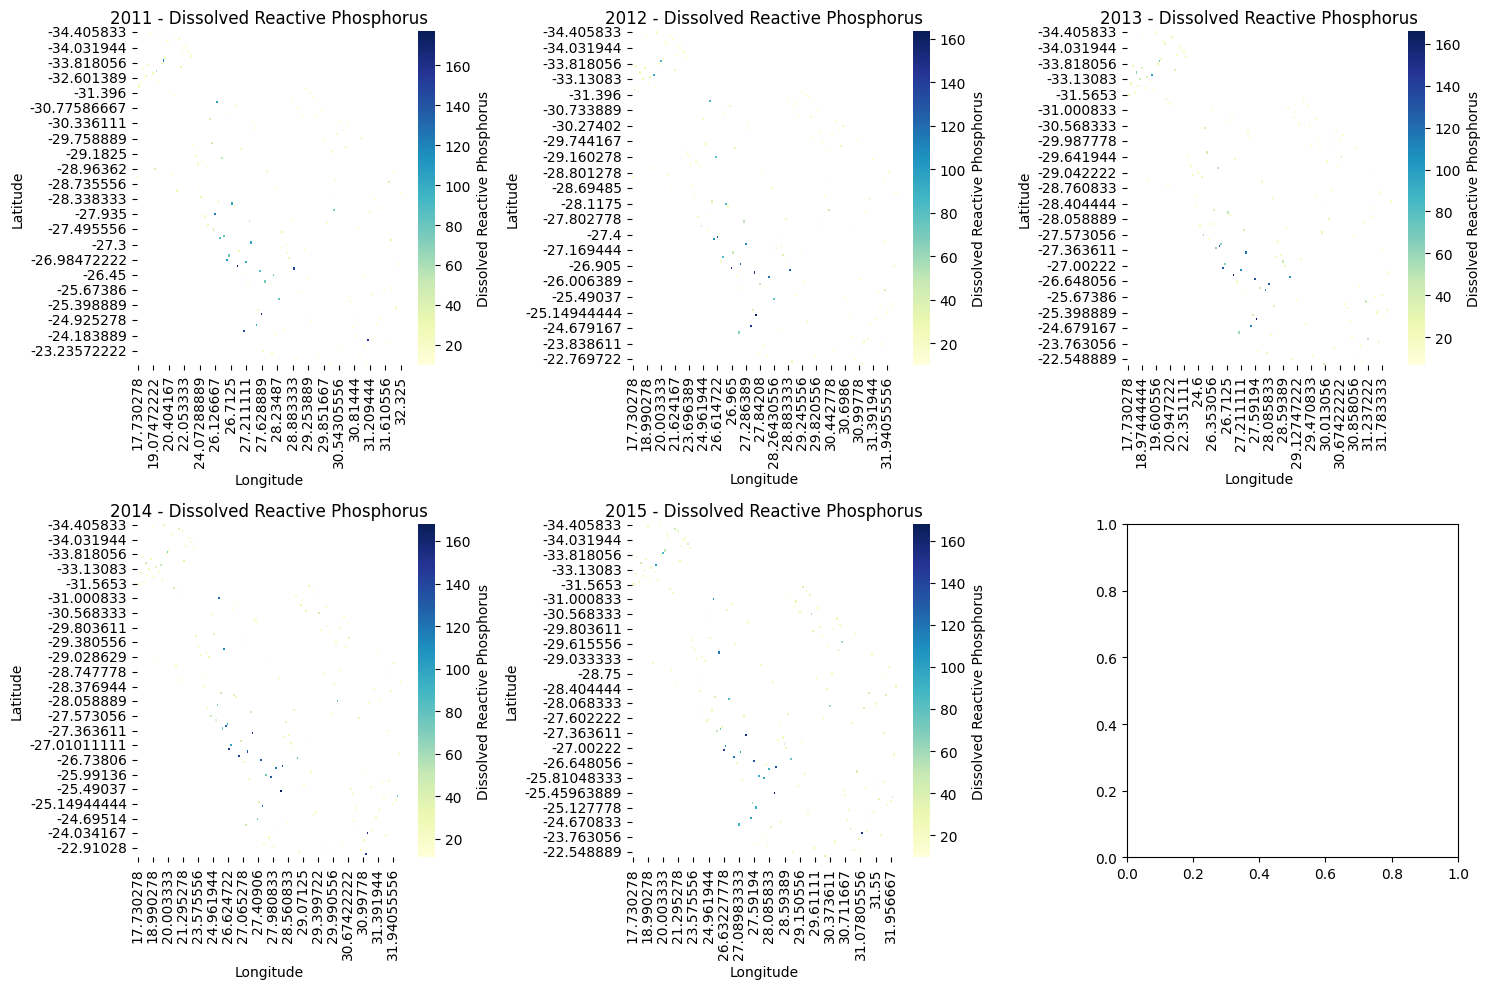

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

plot_heatmap(df, 'Dissolved Reactive Phosphorus', axes[0, 0], 2011)
plot_heatmap(df, 'Dissolved Reactive Phosphorus', axes[0, 1], 2012)
plot_heatmap(df, 'Dissolved Reactive Phosphorus', axes[0, 2], 2013)
plot_heatmap(df, 'Dissolved Reactive Phosphorus', axes[1, 0], 2014)
plot_heatmap(df, 'Dissolved Reactive Phosphorus', axes[1, 1], 2015)

plt.tight_layout()
plt.show()

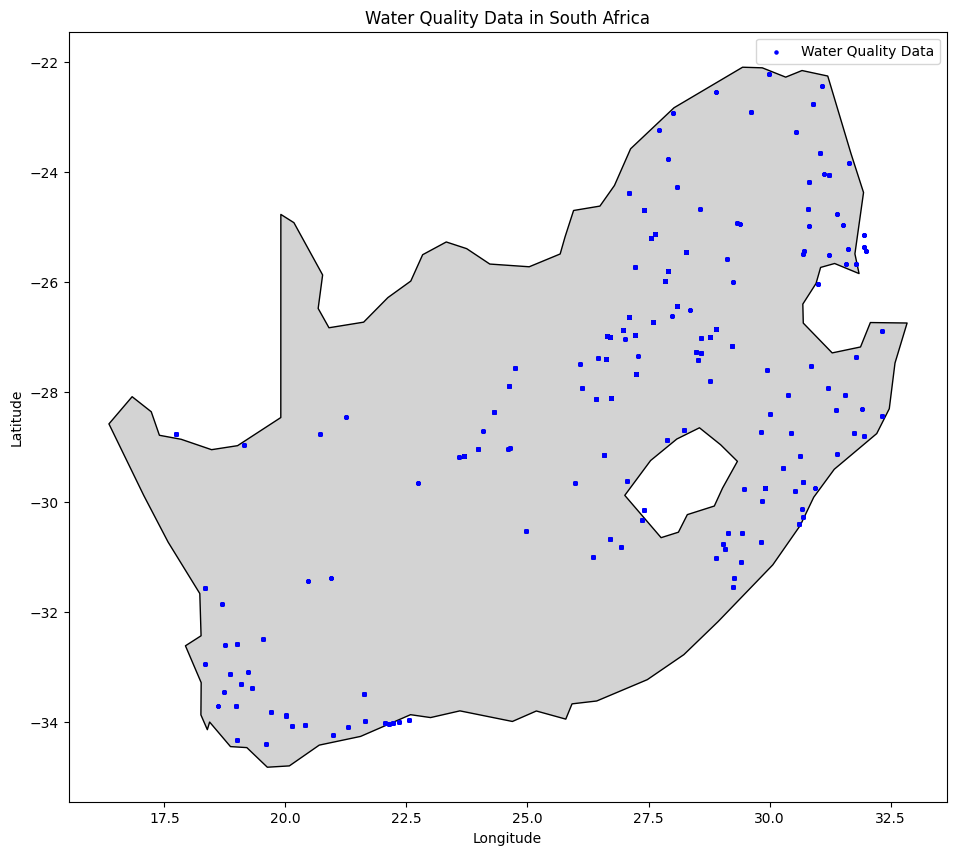

In [21]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

WQ_TRAIN_PATH = "water_quality_training_dataset.csv"
df = pd.read_csv(WQ_TRAIN_PATH)
df.columns = [c.strip() for c in df.columns]  

TARGETS = ["Total Alkalinity", "Electrical Conductance", "Dissolved Reactive Phosphorus"]

for c in ["Latitude", "Longitude"] + TARGETS:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = df.dropna(subset=["Latitude", "Longitude"] + TARGETS).copy()

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["Longitude"], df["Latitude"]),
    crs="EPSG:4326"
)

url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)

sa = world[world['NAME'].str.contains("South Africa", na=False)].to_crs("EPSG:4326")

fig, ax = plt.subplots(figsize=(12, 10))

sa.plot(ax=ax, color='lightgray', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='blue', markersize=5, label='Water Quality Data')
plt.title("Water Quality Data in South Africa")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.legend()
plt.show()

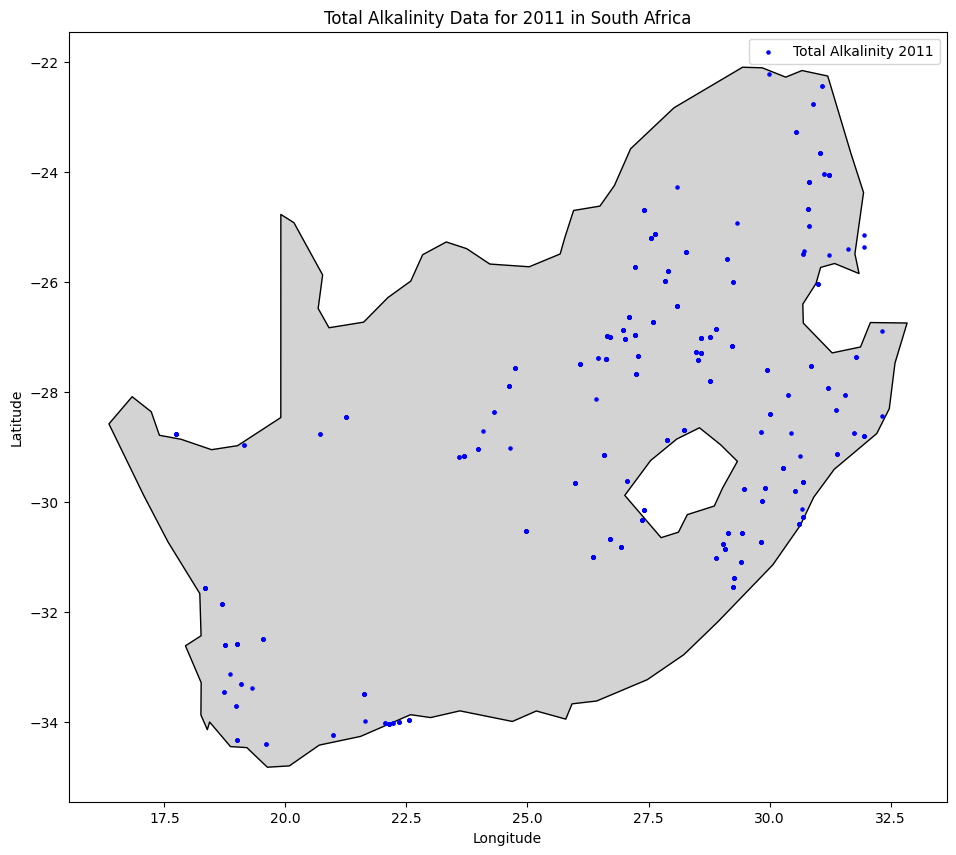

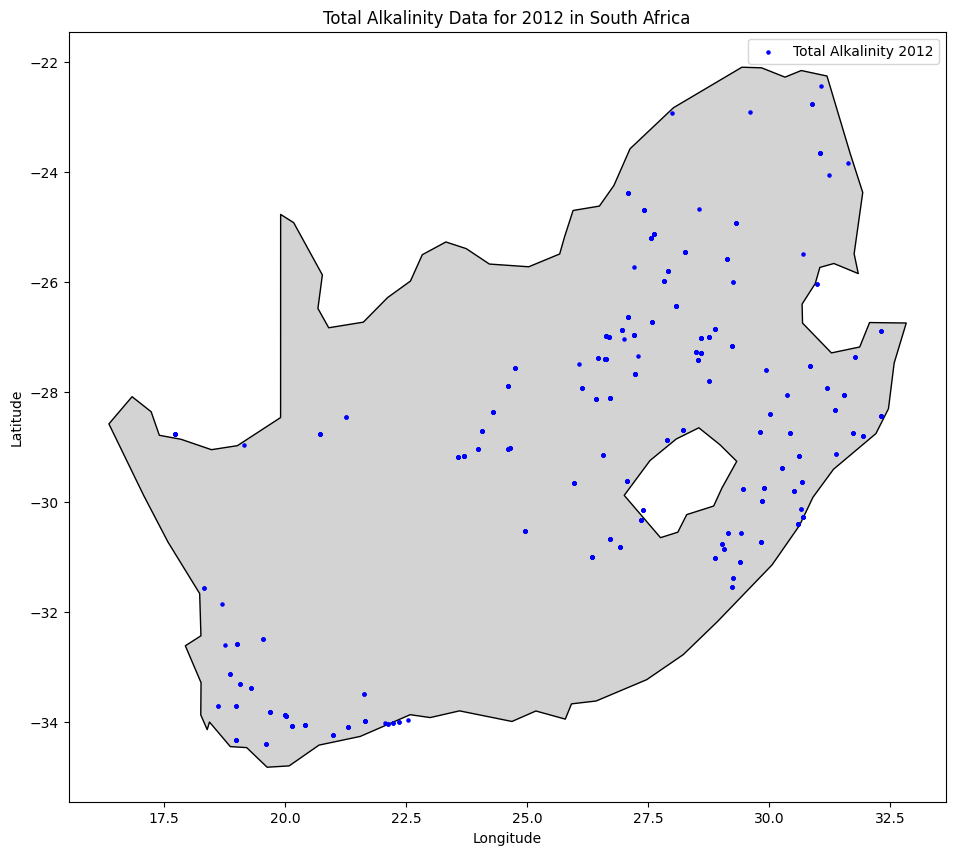

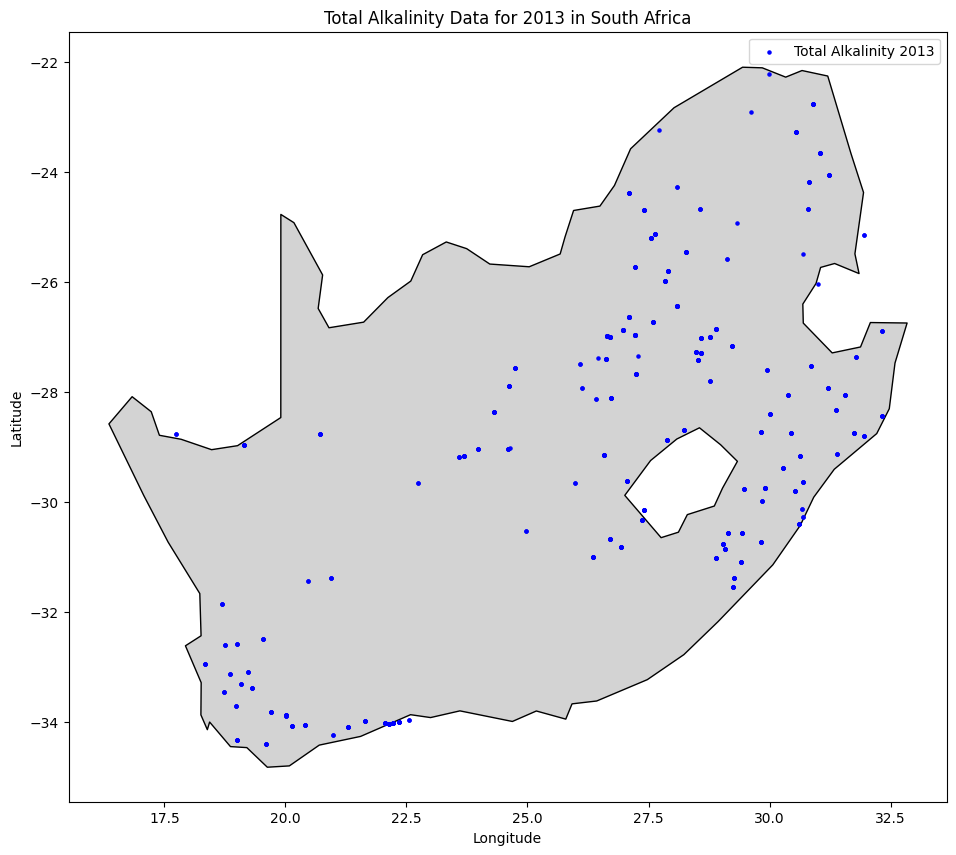

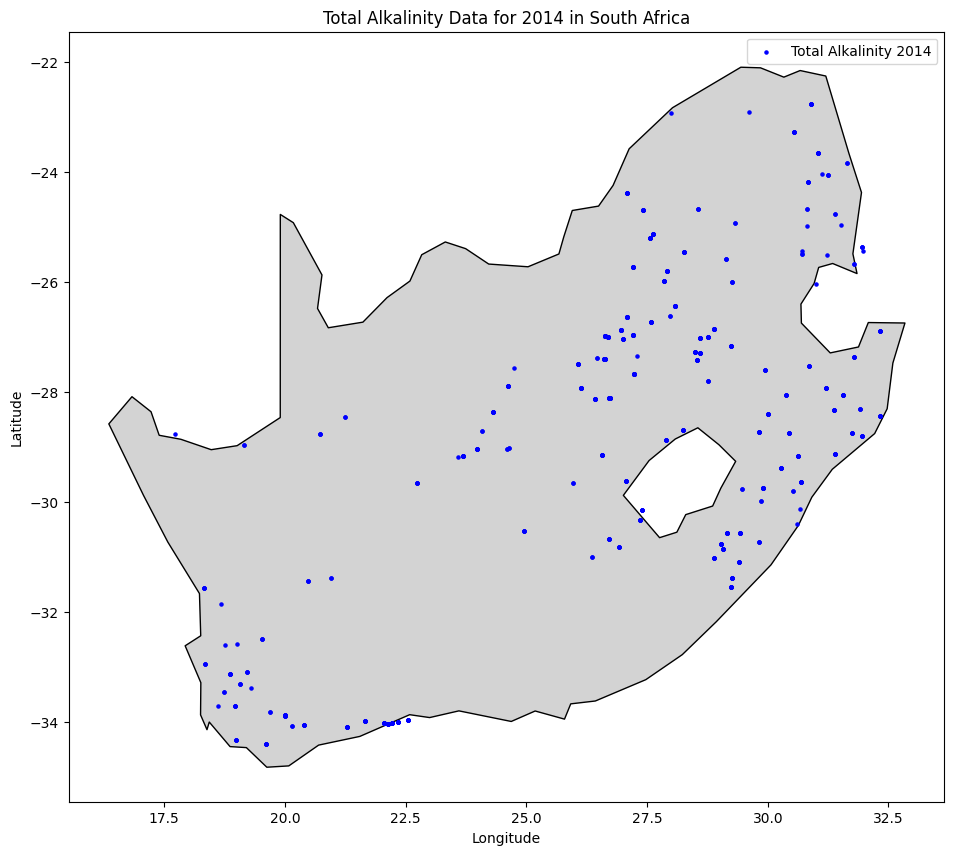

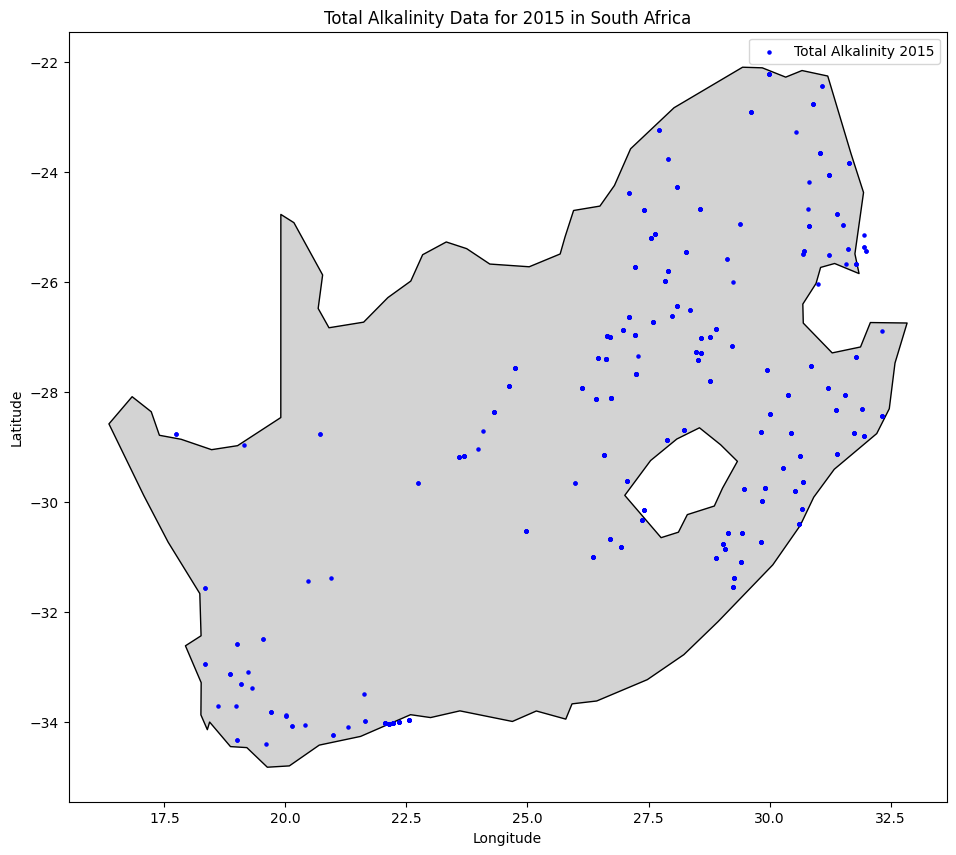

In [23]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

WQ_TRAIN_PATH = "water_quality_training_dataset.csv"
df = pd.read_csv(WQ_TRAIN_PATH)
df.columns = [c.strip() for c in df.columns] 

df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')

df = df[(df['Sample Date'].dt.year >= 2010) & (df['Sample Date'].dt.year <= 2015)]
TARGET = "Total Alkalinity"

df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")
df = df.dropna(subset=["Latitude", "Longitude", TARGET]).copy()

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["Longitude"], df["Latitude"]),
    crs="EPSG:4326" 
)

url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)

sa = world[world['NAME'].str.contains("South Africa", na=False)].to_crs("EPSG:4326")

years = [2011, 2012, 2013, 2014, 2015]
for year in years:
    df_year = df[df['Sample Date'].dt.year == year]

    gdf_year = gpd.GeoDataFrame(
        df_year,
        geometry=gpd.points_from_xy(df_year["Longitude"], df_year["Latitude"]),
        crs="EPSG:4326"
    )

    fig, ax = plt.subplots(figsize=(12, 10))

    sa.plot(ax=ax, color='lightgray', edgecolor='black')

    gdf_year.plot(ax=ax, marker='o', color='blue', markersize=5, label=f'{TARGET} {year}')

    plt.title(f"Total Alkalinity Data for {year} in South Africa")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    plt.legend()
    plt.show()

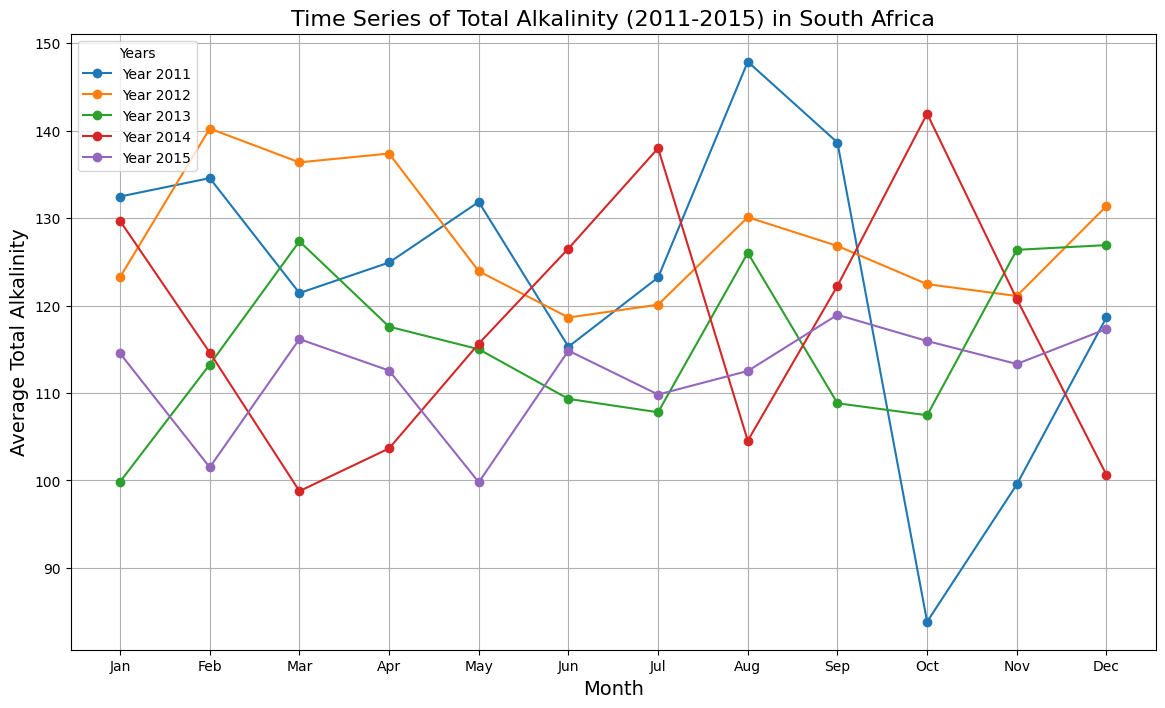

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

WQ_TRAIN_PATH = "water_quality_training_dataset.csv"
df = pd.read_csv(WQ_TRAIN_PATH)
df.columns = [c.strip() for c in df.columns]  

df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
df = df[(df['Sample Date'].dt.year >= 2010) & (df['Sample Date'].dt.year <= 2015)]

TARGET = "Total Alkalinity"

df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")
df = df.dropna(subset=["Latitude", "Longitude", TARGET]).copy()

df['Year'] = df['Sample Date'].dt.year
df['Month'] = df['Sample Date'].dt.month

plt.figure(figsize=(14, 8))

for year in range(2011, 2016):
    df_year = df[df['Year'] == year]
    df_monthly = df_year.groupby('Month')[TARGET].mean()
    plt.plot(df_monthly.index, df_monthly.values, label=f'Year {year}', marker='o')

plt.title("Time Series of Total Alkalinity (2011-2015) in South Africa", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Total Alkalinity", fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title="Years", loc='upper left')
plt.grid(True)
plt.show()

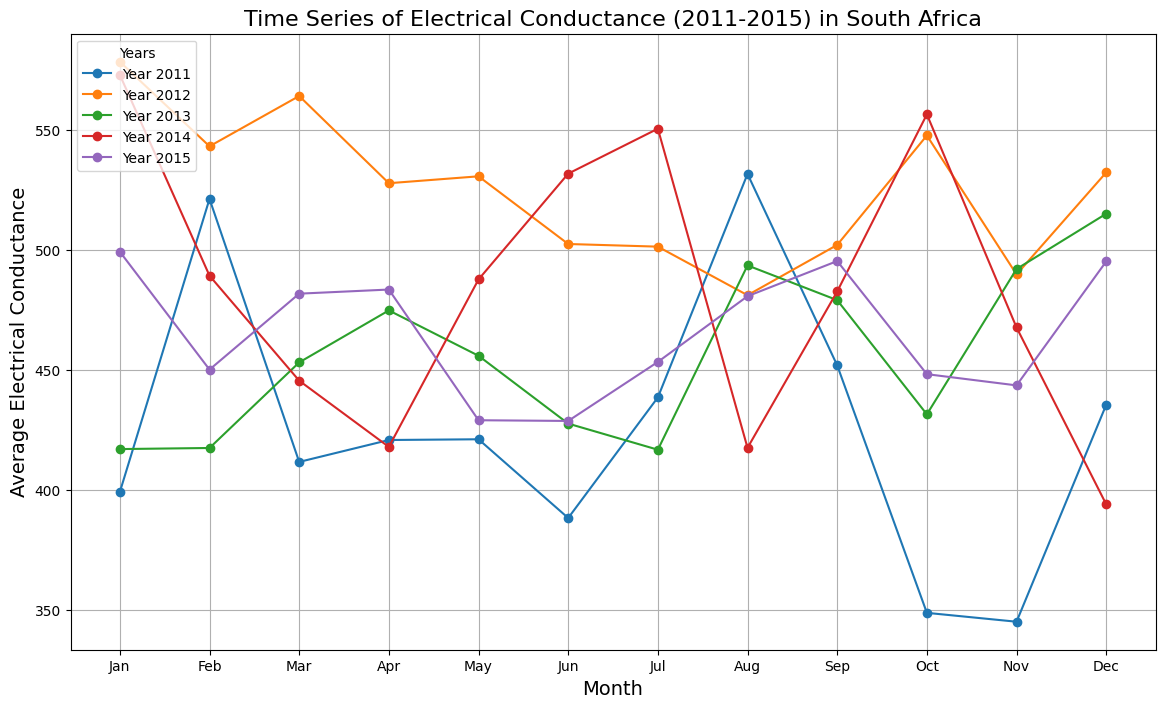

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

WQ_TRAIN_PATH = "water_quality_training_dataset.csv"
df = pd.read_csv(WQ_TRAIN_PATH)
df.columns = [c.strip() for c in df.columns] 

df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
df = df[(df['Sample Date'].dt.year >= 2010) & (df['Sample Date'].dt.year <= 2015)]

TARGET = "Electrical Conductance"
df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")
df = df.dropna(subset=["Latitude", "Longitude", TARGET]).copy()
df['Year'] = df['Sample Date'].dt.year
df['Month'] = df['Sample Date'].dt.month

plt.figure(figsize=(14, 8))

for year in range(2011, 2016):
    df_year = df[df['Year'] == year]
    df_monthly = df_year.groupby('Month')[TARGET].mean()
    plt.plot(df_monthly.index, df_monthly.values, label=f'Year {year}', marker='o')

plt.title("Time Series of Electrical Conductance (2011-2015) in South Africa", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Electrical Conductance", fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title="Years", loc='upper left')

plt.grid(True)
plt.show()

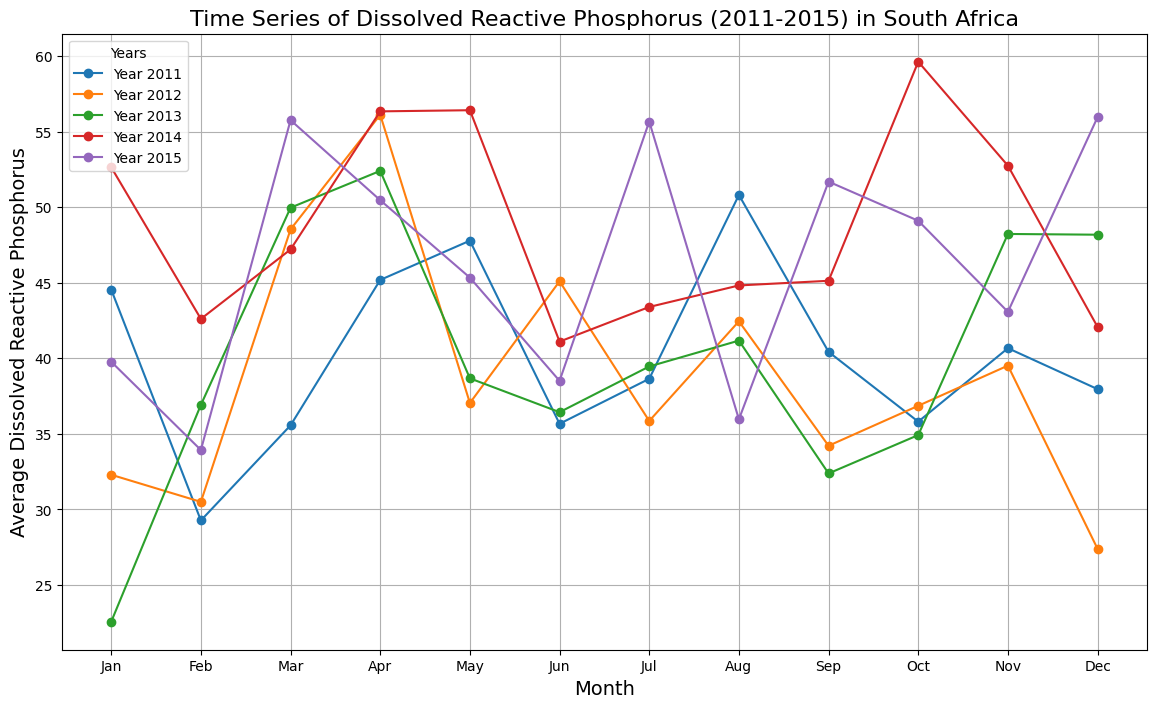

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

WQ_TRAIN_PATH = "water_quality_training_dataset.csv"
df = pd.read_csv(WQ_TRAIN_PATH)
df.columns = [c.strip() for c in df.columns]  

df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
df = df[(df['Sample Date'].dt.year >= 2010) & (df['Sample Date'].dt.year <= 2015)]
TARGET = "Dissolved Reactive Phosphorus"

df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")
df = df.dropna(subset=["Latitude", "Longitude", TARGET]).copy()

df['Year'] = df['Sample Date'].dt.year
df['Month'] = df['Sample Date'].dt.month

plt.figure(figsize=(14, 8))

for year in range(2011, 2016):
    df_year = df[df['Year'] == year]
    df_monthly = df_year.groupby('Month')[TARGET].mean()
    plt.plot(df_monthly.index, df_monthly.values, label=f'Year {year}', marker='o')

plt.title("Time Series of Dissolved Reactive Phosphorus (2011-2015) in South Africa", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Dissolved Reactive Phosphorus", fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title="Years", loc='upper left')

plt.grid(True)
plt.show()

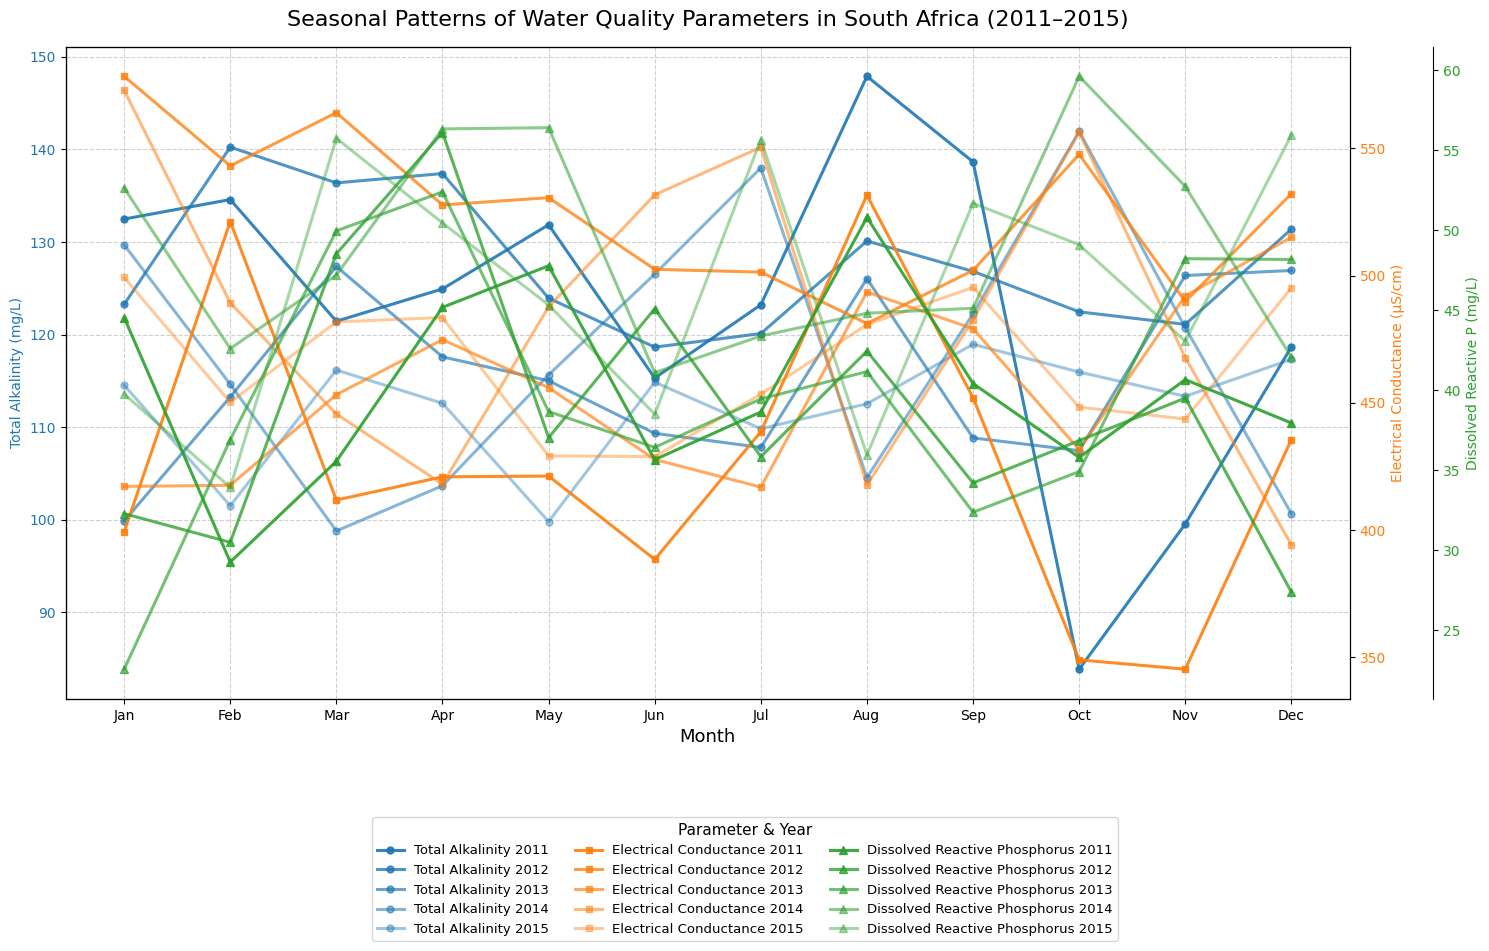

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ── Configuration ───────────────────────────────────────────────
WQ_TRAIN_PATH = "water_quality_training_dataset.csv"
TARGETS = {
    "Total Alkalinity": "tab:blue",
    "Electrical Conductance": "tab:orange",
    "Dissolved Reactive Phosphorus": "tab:green"
}

YEARS_TO_PLOT = range(2011, 2016)

# ── Data loading & preprocessing ─────────────────────────────────
df = pd.read_csv(WQ_TRAIN_PATH)
df.columns = [c.strip() for c in df.columns]

# Convert date
df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')

# Filter years
df = df[(df['Sample Date'].dt.year >= 2010) & (df['Sample Date'].dt.year <= 2015)]

# Convert targets to numeric
for target in TARGETS:
    df[target] = pd.to_numeric(df[target], errors="coerce")

# Drop rows missing location or any of the targets
df = df.dropna(subset=["Latitude", "Longitude"] + list(TARGETS.keys())).copy()

# Create helper columns
df['Year'] = df['Sample Date'].dt.year
df['Month'] = df['Sample Date'].dt.month

# ── Prepare monthly averages for each year ────────────────────────
monthly_data = {}

for target in TARGETS:
    monthly_data[target] = {}
    for year in YEARS_TO_PLOT:
        df_year = df[df['Year'] == year]
        monthly_avg = df_year.groupby('Month')[target].mean()
        monthly_data[target][year] = monthly_avg

# ── Plotting ──────────────────────────────────────────────────────
fig, ax1 = plt.subplots(figsize=(15, 8))

axes = [ax1]  # We will add more axes later
colors = list(TARGETS.values())
lines = []    # for legend
labels = []

# ── First axis: Total Alkalinity ──────────────────────────────────
target = "Total Alkalinity"
ax = ax1
ax.set_ylabel("Total Alkalinity (mg/L)", color=colors[0])
ax.tick_params(axis='y', labelcolor=colors[0])

for year in YEARS_TO_PLOT:
    monthly = monthly_data[target][year]
    line, = ax.plot(monthly.index, monthly.values, 
                    color=colors[0], alpha=0.9 - (year-2011)*0.12,
                    linewidth=2.2, marker='o', markersize=5,
                    label=f"{target} {year}")
    lines.append(line)
    labels.append(f"{target} {year}")

# ── Second axis: Electrical Conductance ───────────────────────────
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 0))
ax2.set_ylabel("Electrical Conductance (μS/cm)", color=colors[1])
ax2.tick_params(axis='y', labelcolor=colors[1])

target = "Electrical Conductance"
for year in YEARS_TO_PLOT:
    monthly = monthly_data[target][year]
    line, = ax2.plot(monthly.index, monthly.values, 
                     color=colors[1], alpha=0.9 - (year-2011)*0.12,
                     linewidth=2.2, marker='s', markersize=5,
                     label=f"{target} {year}")
    lines.append(line)
    labels.append(f"{target} {year}")

# ── Third axis: Dissolved Reactive Phosphorus ─────────────────────
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # move further right
ax3.set_ylabel("Dissolved Reactive P (mg/L)", color=colors[2])
ax3.tick_params(axis='y', labelcolor=colors[2])

target = "Dissolved Reactive Phosphorus"
for year in YEARS_TO_PLOT:
    monthly = monthly_data[target][year]
    line, = ax3.plot(monthly.index, monthly.values, 
                     color=colors[2], alpha=0.9 - (year-2011)*0.12,
                     linewidth=2.2, marker='^', markersize=6,
                     label=f"{target} {year}")
    lines.append(line)
    labels.append(f"{target} {year}")

# ── Common styling ────────────────────────────────────────────────
ax1.set_title("Seasonal Patterns of Water Quality Parameters in South Africa (2011–2015)", 
              fontsize=16, pad=15)
ax1.set_xlabel("Month", fontsize=13)
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun',
                     'Jul','Aug','Sep','Oct','Nov','Dec'])

ax1.grid(True, linestyle='--', alpha=0.6)

# Combined legend (showing all lines)
fig.legend(lines, labels, 
           loc='upper center', 
           ncol=3, 
           bbox_to_anchor=(0.5, -0.02),
           title="Parameter & Year",
           fontsize=9.5, title_fontsize=11)
plt.tight_layout()
plt.subplots_adjust(bottom=0.12)   
plt.show()